In [1]:
%config IPCompleter.greedy=True
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras

Execution Environment: This notebook has been executed in Azure ML Compute with Python 3.6 and TF:

In [2]:
print(tf.__version__)

2.1.0


# Deep Learning - Assignement 2 - Part A - i

#### R00183247 - Adam Zebrowski

In [3]:
#Load assignment dataset, as per provided code
def loadDataH5():
    with h5py.File('data/data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY
trainX, trainY, testX, testY = loadDataH5()



(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [4]:
#Initial run will be for 25 iterations
NUM_EPOCHS = 25
#Assignment dataset has 17 different classes
CLASSES = 17
BATCH_SIZE = 32

WIDTH = trainX.shape[2]
HEIGHT = trainX.shape[1]
DEPTH = trainX.shape[3]



In [5]:
#Helper function to draw the output of model run
def visualiseOutput(history):
    
    print("\n")
    print("Min Val Loss: ", min(history.history['val_loss']))
    print("Max Val Accuracy: ", max(history.history['val_accuracy']))
    print("\n")
    
    
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
   
    plt.title('Training Loss and Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epoch #')
    plt.legend(['train loss', 'val loss', 'train acc', 'val acc'], loc='upper right')
    plt.show()

In [6]:
#Manin function to execute a model
#It takes any model as parameter and visualises validation accuracy
def executeModel(model):
    #Using SDG as advised in the assignment
    opt = keras.optimizers.SGD(lr=0.01)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    h = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testX, testY), verbose=0)
    #Visualise output
    visualiseOutput(h)
    return

#### Part i
Implement a baseline CNN, which contains just a single convolutional layer, single pooling layer, fully connected layer and softmax layer.
Increase the number of layers in your CNN (the number of convolutional and pooling layers). 
You should implement at least three different CNN configurations (not including the baseline). In your report show the impact on the validation and training accuracy/loss values (inclusive of the baseline case). 
Compare and contrast the performance of your models in your report.


In [7]:
#Single layer, the most basic model
def singleLayers():
    inputShape = (HEIGHT, WIDTH, DEPTH)
    model = keras.models.Sequential()
    #First conv layer, 64 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    #Flaten the output for FC layers
    model.add(keras.layers.Flatten())
    #FC Layer
    model.add(keras.layers.Dense(512,activation='relu'))
    #Classification layer with 17 classes
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model



Min Val Loss:  1.3340896241805134
Max Val Accuracy:  0.5852941




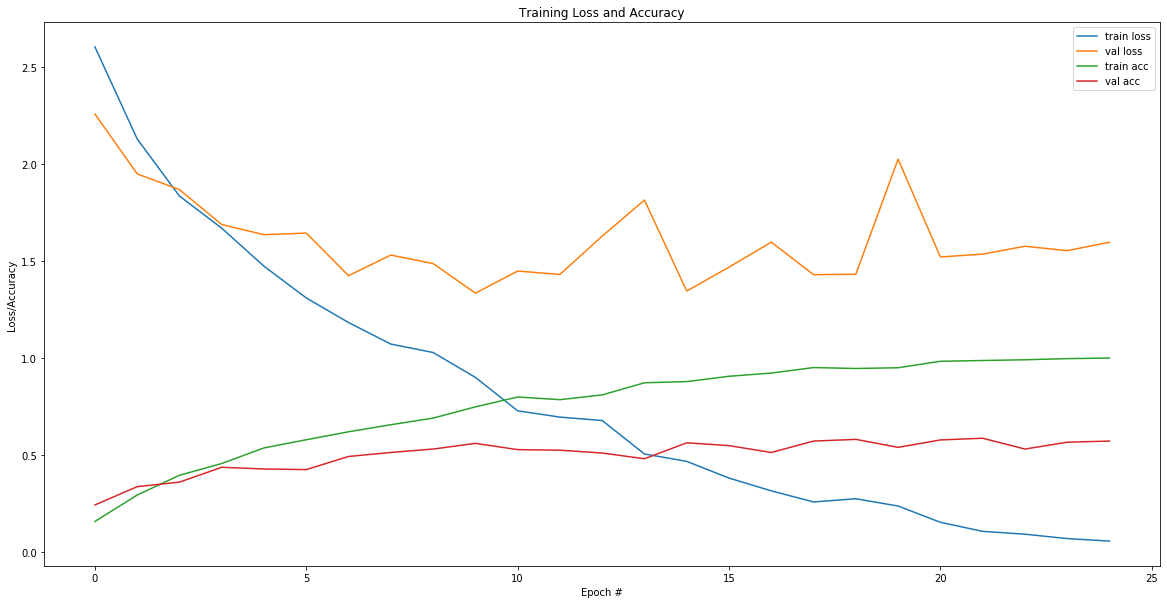

In [9]:
#Execute the model
with tf.device("/GPU:1"):
    executeModel(singleLayers())

In [10]:
#First deeper network repeats the single block form initial baseline CNN 2x
def deeper1():
    inputShape = (HEIGHT, WIDTH, DEPTH)
    model = keras.models.Sequential()
    #Block 1
    #First conv layer, 64 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Block 2
    #First conv layer, 64 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Flaten the output for FC layers
    model.add(keras.layers.Flatten())
    #FC Layer
    model.add(keras.layers.Dense(512,activation='relu'))
    #Classification layer with 17 classes
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model



Min Val Loss:  1.3701551633722642
Max Val Accuracy:  0.59117645




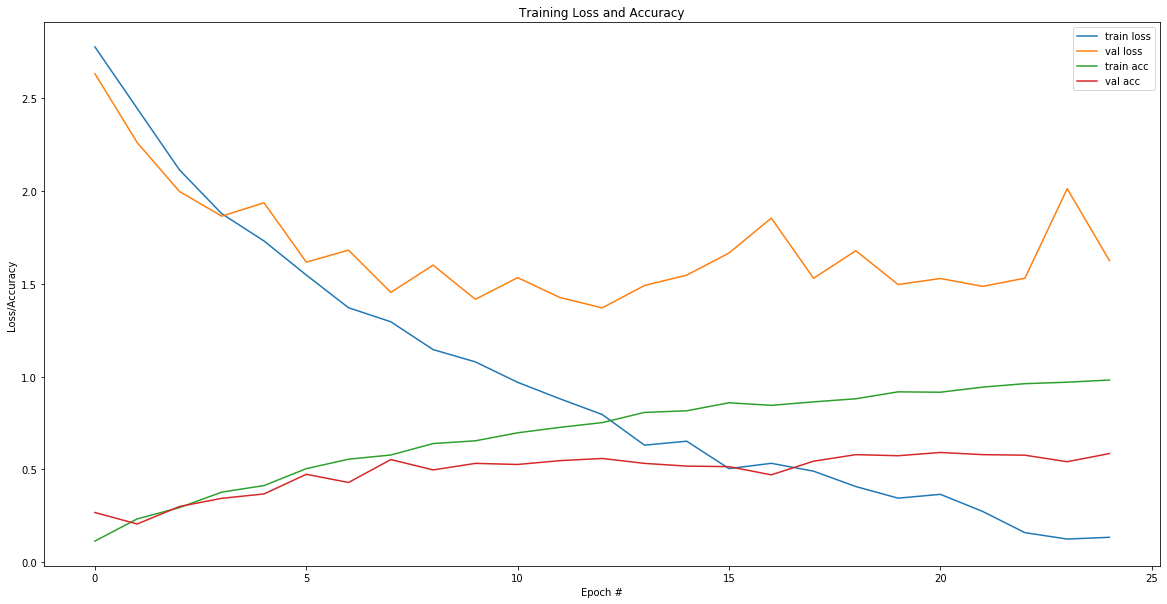

In [11]:
with tf.device("/GPU:1"):
    executeModel(deeper1())

In [12]:
#Second deeper network extend ths previous one with adding 3rd block.
#This network introduced increase of filter number at each block
def deeper2():
    inputShape = (HEIGHT, WIDTH, DEPTH)
    model = keras.models.Sequential()
     #Block 1
    #First conv layer, 64 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Block 2
    #First conv layer, 128 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Block 3
    #First conv layer, 256 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Flaten the output for FC layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model



Min Val Loss:  1.3966538148767809
Max Val Accuracy:  0.5735294




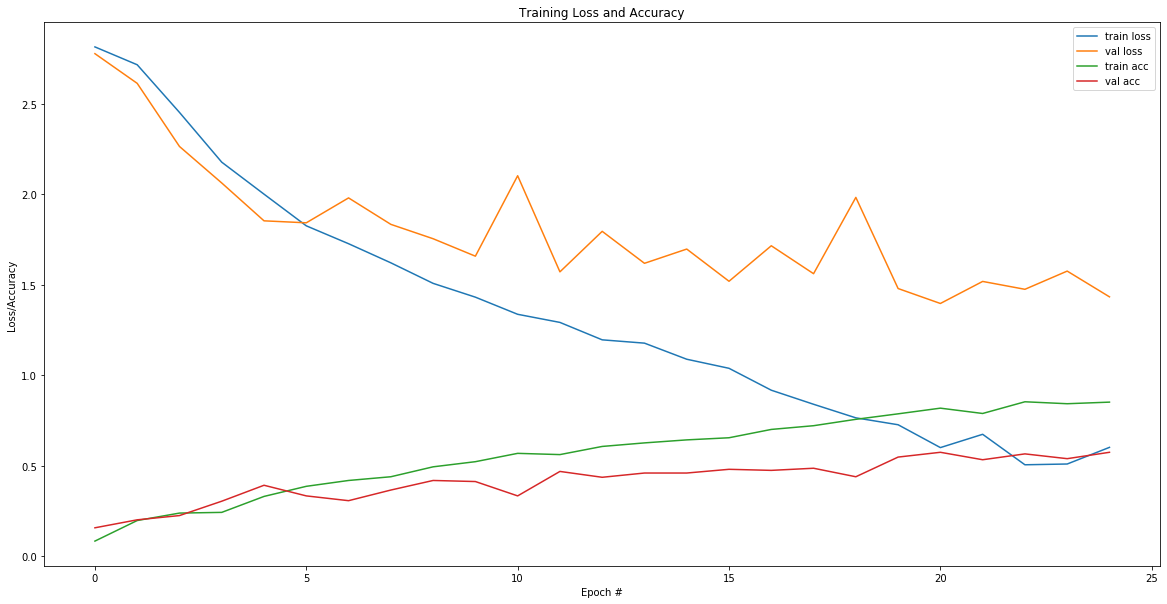

In [13]:

with tf.device("/GPU:1"):
    executeModel(deeper2())

In [14]:
#The last network introduces yet another block and continues to double the number of 
#filters in each subsequent block
#The difference from previous networks is additional conv layer in the last block
def deeper3():
    model = keras.models.Sequential()
    inputShape = (HEIGHT, WIDTH, DEPTH)
    #Block 1
    #First conv layer, 128 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Block 2
    #First conv layer, 256 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Block 3
    #First conv layer, 512 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(512, (3, 3), padding="same", activation='relu'))
    #Pooling layer, with window of 2x2
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    #Block 4
    #Double conv layer, 1024 filters and window of 3x3, stride 1, padding to retain size
    model.add(keras.layers.Conv2D(1024, (3, 3), padding="same", activation='relu'))
    model.add(keras.layers.Conv2D(1024, (3, 3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    #Flaten the output for FC layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model



Min Val Loss:  1.4988549639196957
Max Val Accuracy:  0.5205882




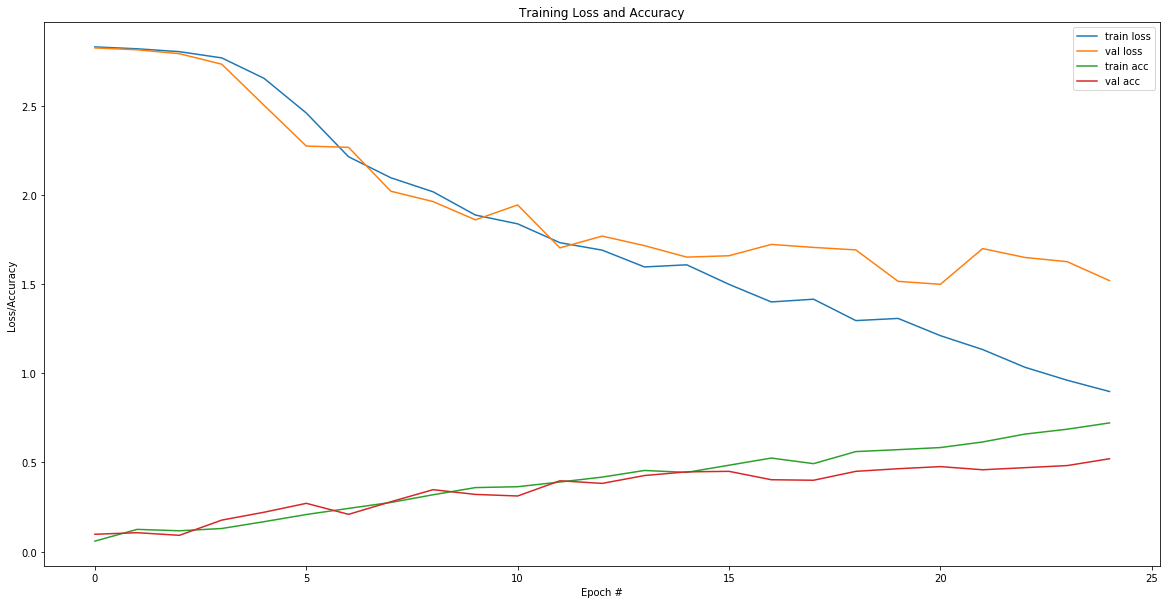

In [15]:
with tf.device("/GPU:1"):
    executeModel(deeper3())

In [16]:
#I'm going to extend the execution to 150 iterations
NUM_EPOCHS = 150
BATCH_SIZE = 32


In [17]:
#Main function to execute data augmented model
#This function accepts a model and a augmentation generator
def executeAugmentedModel(model, generator):
    with tf.device('/device:gpu:1'):
        trainGenerator = generator.flow(trainX, trainY, batch_size= BATCH_SIZE)
        opt = keras.optimizers.SGD(lr=0.01)
        model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
        h = model.fit(trainGenerator, validation_data=(testX, testY), epochs = NUM_EPOCHS, verbose=0)
        visualiseOutput(h)
    return

In [18]:
#An inital data augmentation generator, augmenting by applying:
#1. zoom
#2. image rotation
#3. horizontal flip
#4. vertical flip
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True
    
    )


  ...
    to  
  ['...']


Min Val Loss:  0.8983316295287188
Max Val Accuracy:  0.7294118




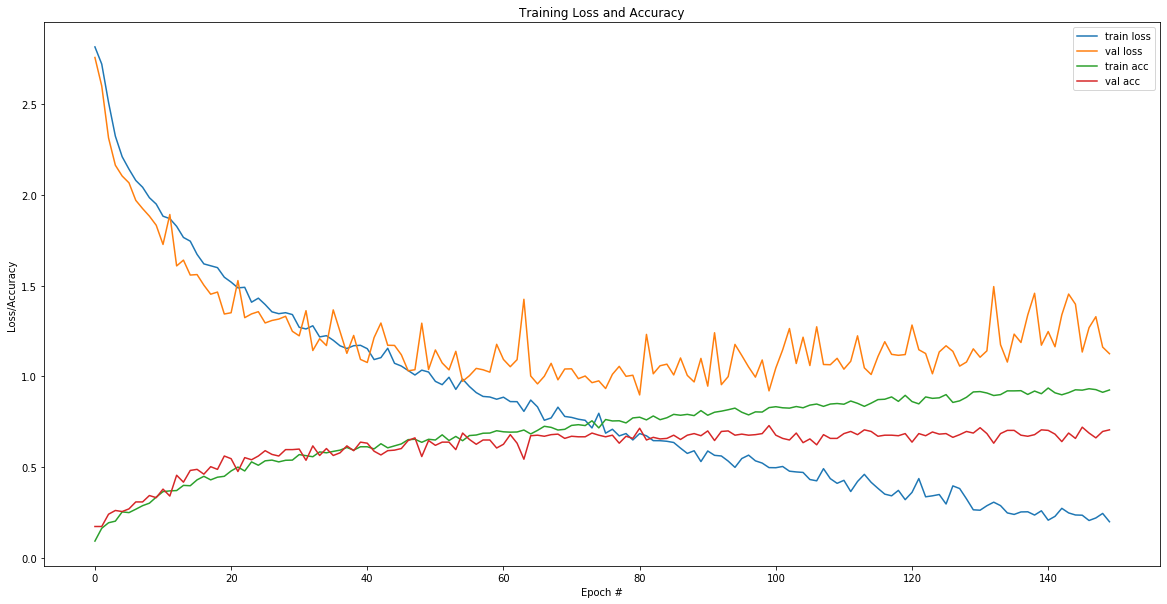

In [19]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper2(), trainDataGenerator)

  ...
    to  
  ['...']


Min Val Loss:  0.8365872320006875
Max Val Accuracy:  0.7705882




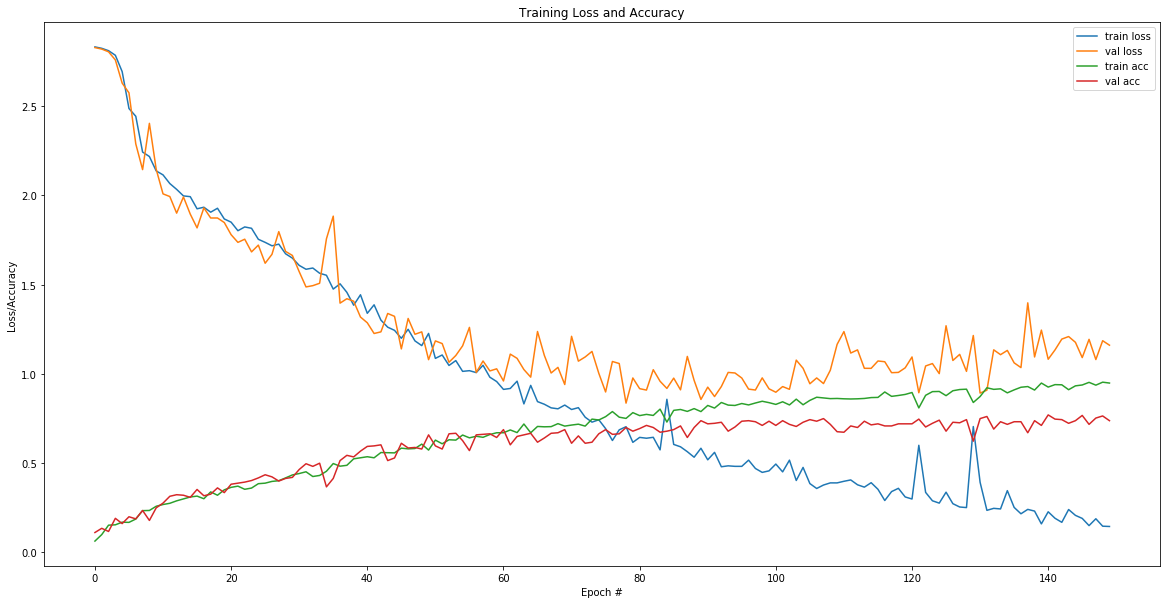

In [20]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper3(), trainDataGenerator)

In [21]:
#Another data augmentation generator, adding widhts and height shifts
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
    
    )

  ...
    to  
  ['...']


Min Val Loss:  0.8580533574609196
Max Val Accuracy:  0.7264706




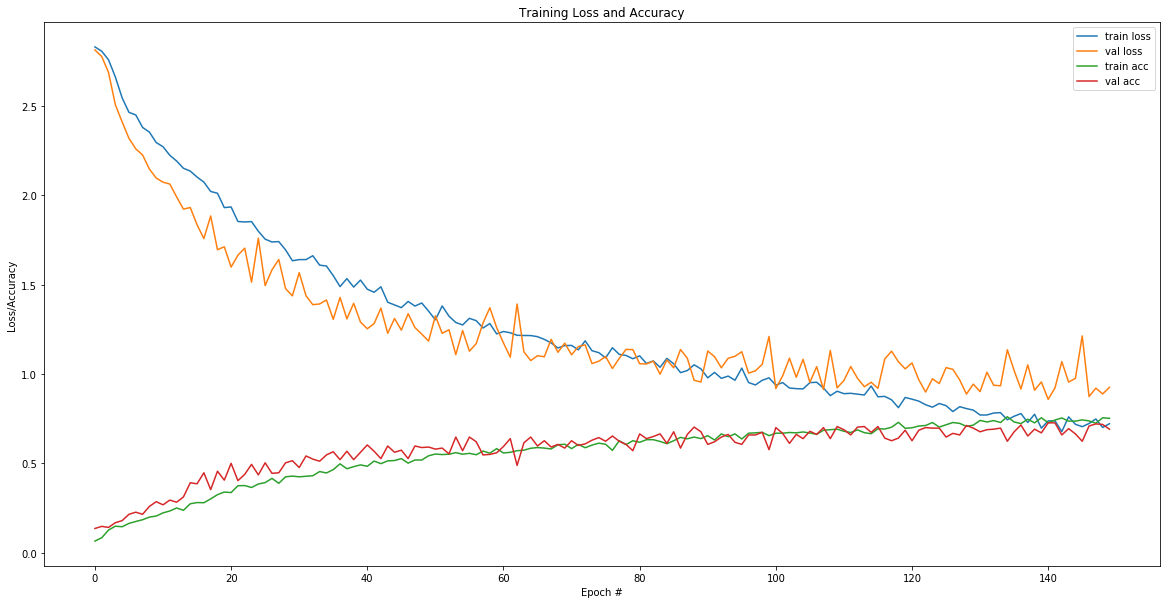

In [22]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper2(), trainDataGenerator)

  ...
    to  
  ['...']


Min Val Loss:  0.855063893514521
Max Val Accuracy:  0.7441176




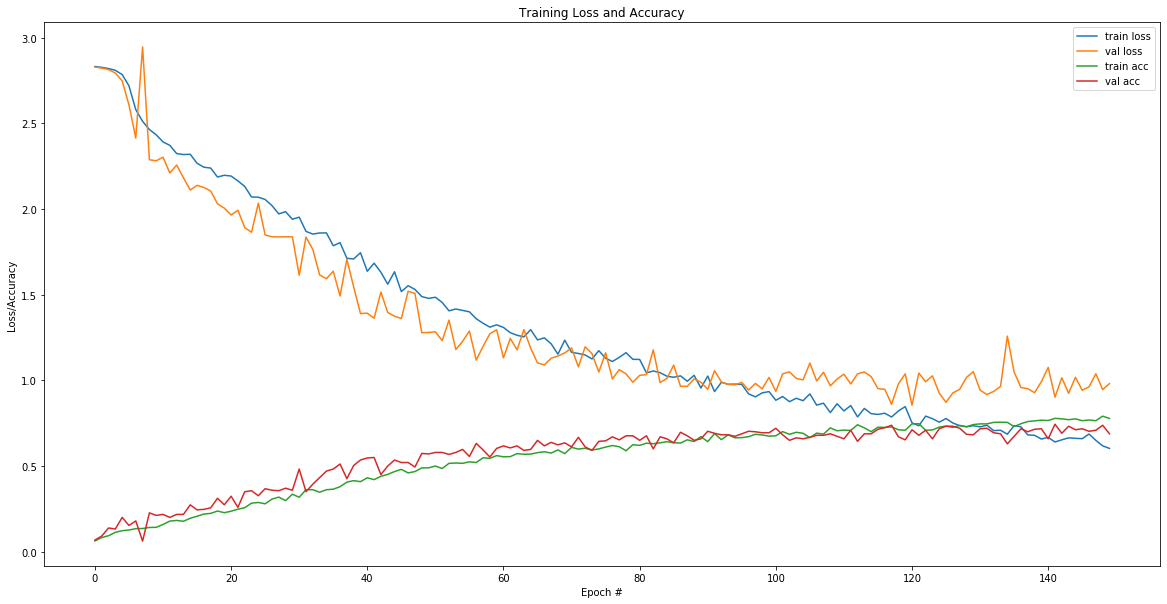

In [23]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper3(), trainDataGenerator)

In [24]:
#Adding image brightness to the generation mix
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.1, 0.9]
    )

  ...
    to  
  ['...']


Min Val Loss:  nan
Max Val Accuracy:  0.055882353




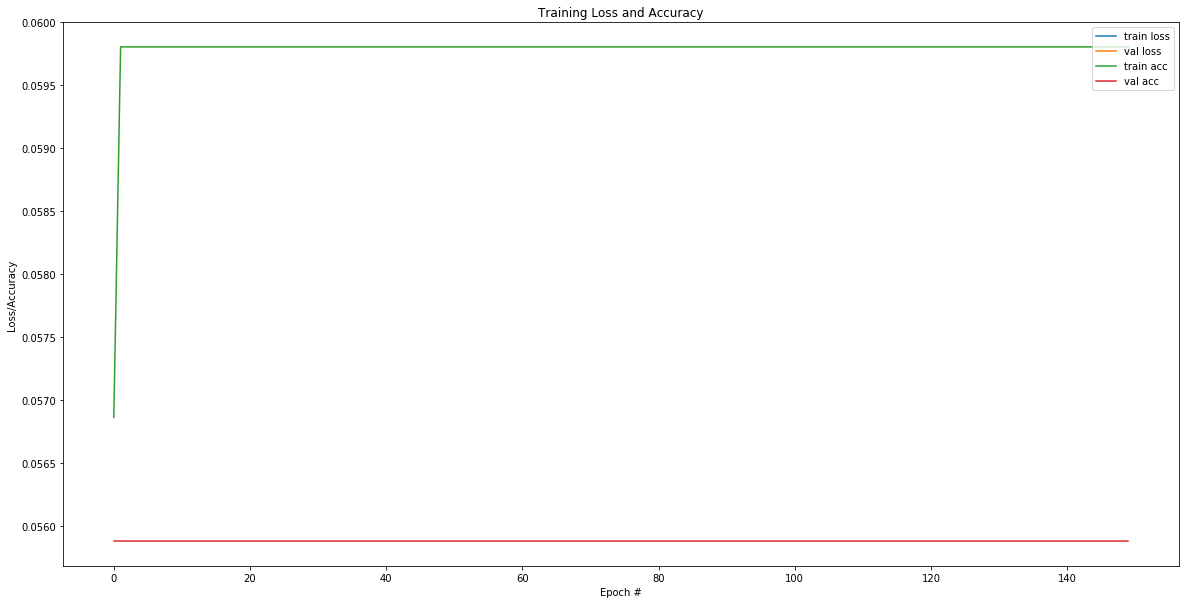

In [25]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper2(), trainDataGenerator)

  ...
    to  
  ['...']


Min Val Loss:  nan
Max Val Accuracy:  0.055882353




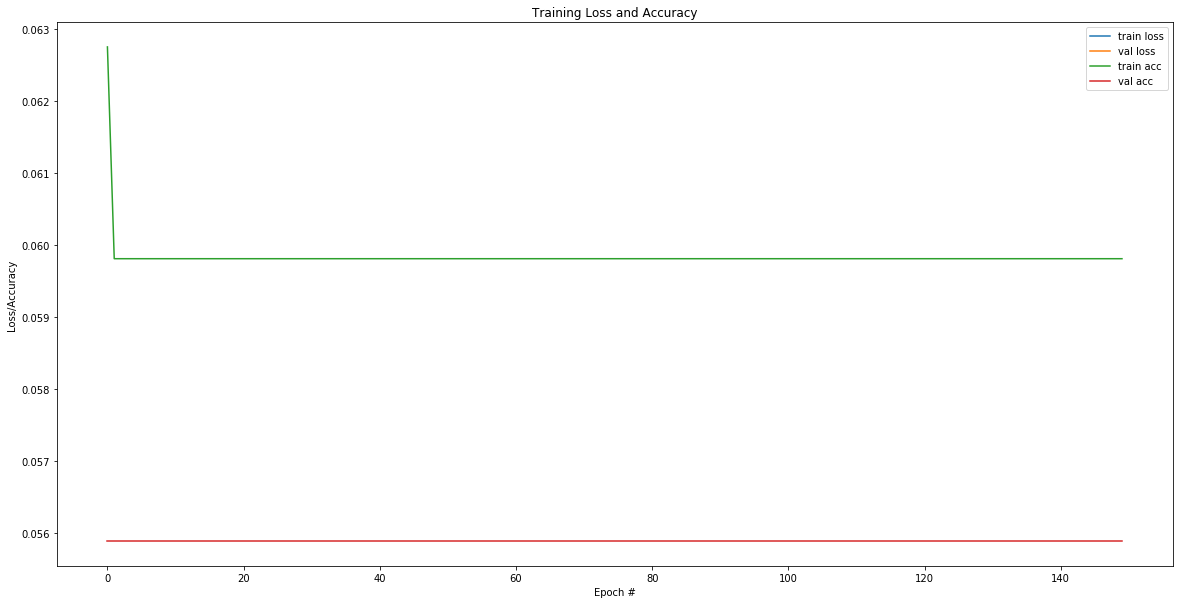

In [26]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper3(), trainDataGenerator)

In [27]:
#Simple generator, usin gonly zoom and rotation
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=90
    )

  ...
    to  
  ['...']


Min Val Loss:  0.926142235363231
Max Val Accuracy:  0.7411765




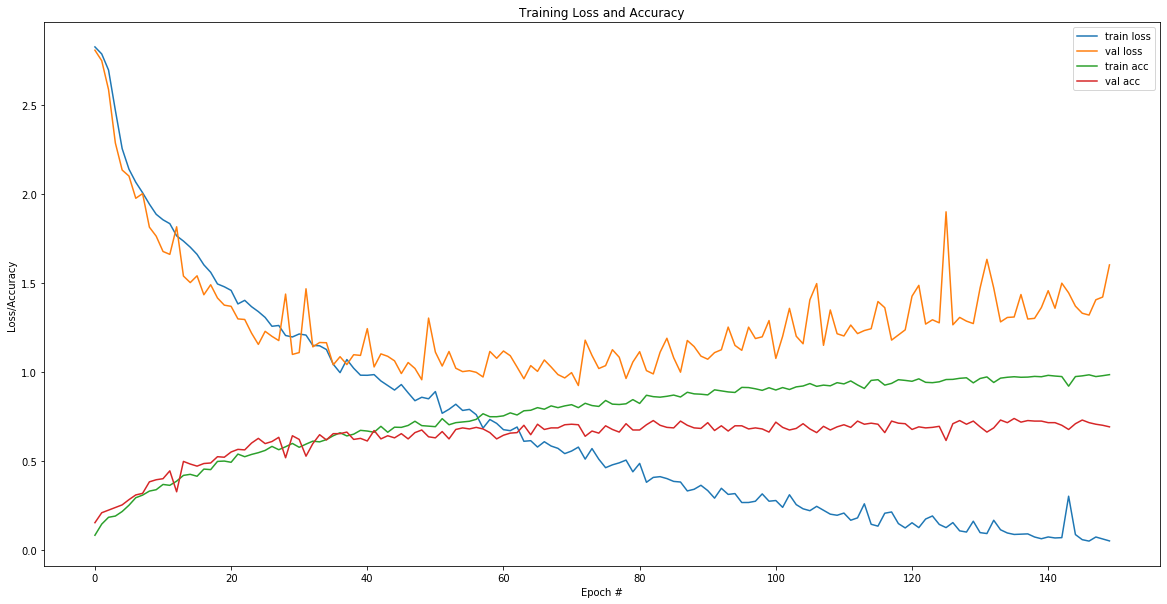

In [28]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper2(), trainDataGenerator)

  ...
    to  
  ['...']


Min Val Loss:  1.031832571590648
Max Val Accuracy:  0.75




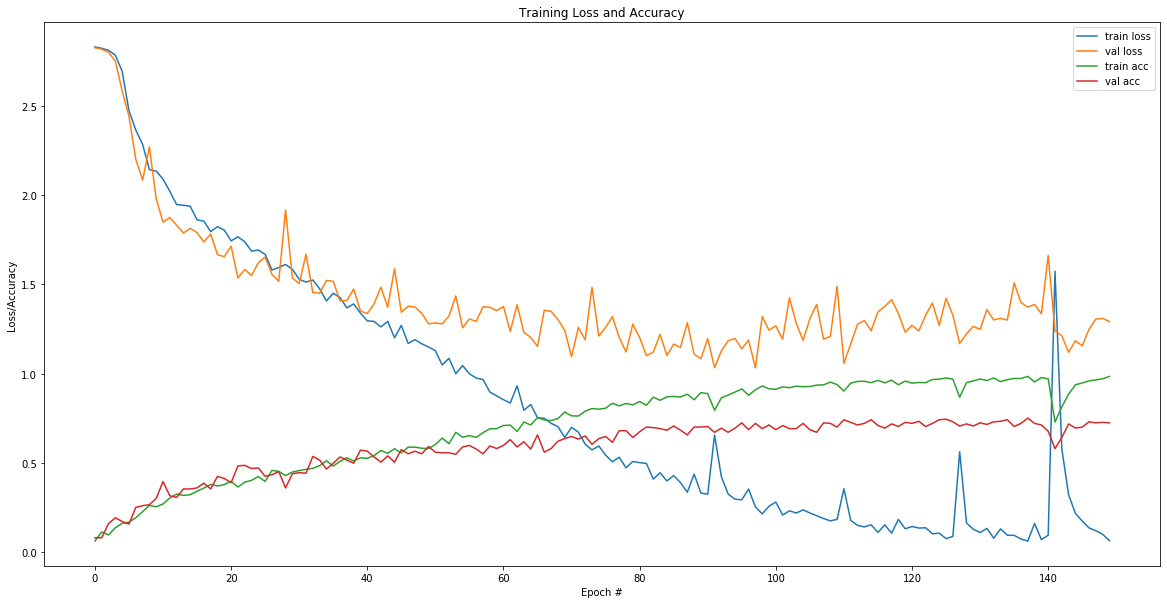

In [29]:
with tf.device("/GPU:1"):
    executeAugmentedModel(deeper3(), trainDataGenerator)